# Trabalho Final - OSEMN

**Importações Básicas**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt
import plotly.express as px
#import streamlit as st
#from google.colab import drive

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm

## Verificação Inicial dos Dados

### **O**btain (Obter)

>[**Telco Customer Churn**](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
>
>**Contexto:**
>
>>_"Prever comportamentos para reter clientes. Você pode analisar todos os dados relevantes dos clientes e desenvolver programas de retenção de clientes focados."_  
>>
>> – IBM Sample Data Sets
>
>**Conteúdo:**
>
>Cada linha representa um cliente, cada coluna contém atributos do cliente descritos na Metadados da coluna.
>
> O conjunto de dados inclui informações sobre:
>
> - Clientes que cancelaram o serviço no último mês - a coluna é chamada Churn (cancelamento)
> - Serviços aos quais cada cliente se inscreveu - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes
> - Informações da conta do cliente - há quanto tempo são clientes, tipo de contrato, método de pagamento, faturamento eletrônico, cobranças mensais e cobranças totais
> - Informações demográficas sobre os clientes - gênero, faixa etária e se têm parceiros e dependentes.
>
>
> **Fonte:** [Kaggle: Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

#### Carregando o Dataset [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [5]:
#Google Drive
#drive.mount('/content/drive')
#file = '/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [6]:
url = 'https://github.com/treselle-systems/customer_churn_analysis/blob/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(file, sep=',')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Sobre o DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **S**crub (Limpeza)

#### Padronizar valores e tipos de dados

Padronizar valores e tipos de dados é essencial na análise de dados, pois garante consistência, comparabilidade e qualidade dos dados. Isso facilita a combinação e a comparação de informações, evita erros e ambiguidades, e permite a realização de análises estatísticas adequadas. Além disso, a padronização melhora a visualização e a comunicação dos resultados, promovendo uma interpretação clara e precisa das descobertas obtidas na análise.

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Lidando com Informações Estatísticas

As informações estatísticas referem-se a dados numéricos ou quantitativos coletados, organizados e analisados para fornecer insights e inferências sobre um fenômeno ou população. Isso envolve medidas de tendência central e dispersão, análises de correlação, testes de significância e modelos de regressão. As informações estatísticas são amplamente utilizadas em diversos campos, fornecendo uma base objetiva para compreender os dados, tomar decisões informadas e obter insights significativos.

In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000



##### Informações estatísticas de variáveis categóricas

In [11]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


#### Lidando com valores nulos

##### Verificar quantidade de valores nulos por coluna

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Lidando com valores `NaN`

Substituir os valores NaN em uma coluna pela mediana dos valores existentes é importante na análise de dados, pois preserva a informação dos outros valores, minimiza o viés e mantém a integridade dos dados. Ao utilizar a mediana, uma medida de tendência central robusta, evita-se distorções causadas por valores extremos. Isso torna os dados mais estáveis e consistentes, facilitando comparações e combinações entre conjuntos de dados. Além disso, essa abordagem melhora a interpretação e a comunicação dos resultados, garantindo análises mais confiáveis e robustas.

###### Substituir os valores `NaN`

Substituir os valores NaN da coluna que possui valores nulos pela mediana dos valores não nulos

In [13]:
mediana = sts.median(df['TotalCharges'])
mediana

6296.75

In [14]:
df['TotalCharges'].fillna(mediana, inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Lidando com Valores Duplicados

In [15]:
df.duplicated().sum()

0

### **E**xplore (Exploração)

#### Examinar ocorrência de Churn

In [16]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

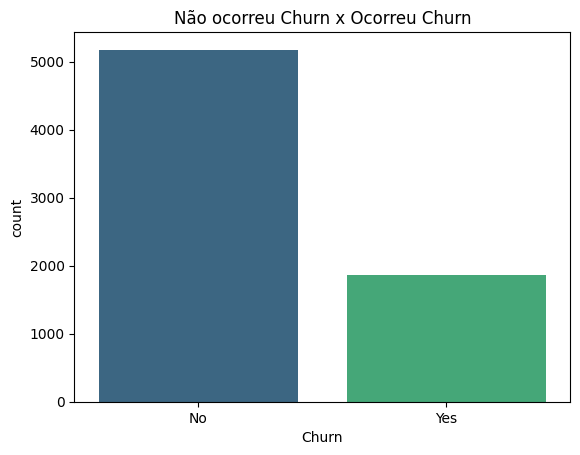

In [17]:
sns.countplot(x='Churn', data=df, palette="viridis")
plt.title('Não ocorreu Churn x Ocorreu Churn');

#### Informações demográficas sobre os clientes

Sexo, faixa etária, parceiros e dependentes

In [18]:
def plot_annotate(ax, title):
    for rect in ax.patches:
        ax.annotate(rect.get_height(),
                (rect.get_x() + rect.get_width()/2, rect.get_height()),
                ha='center', va='baseline', fontsize=12, color='black',
                xytext=(0, 1), textcoords="offset points")
    ax.set_title(title)

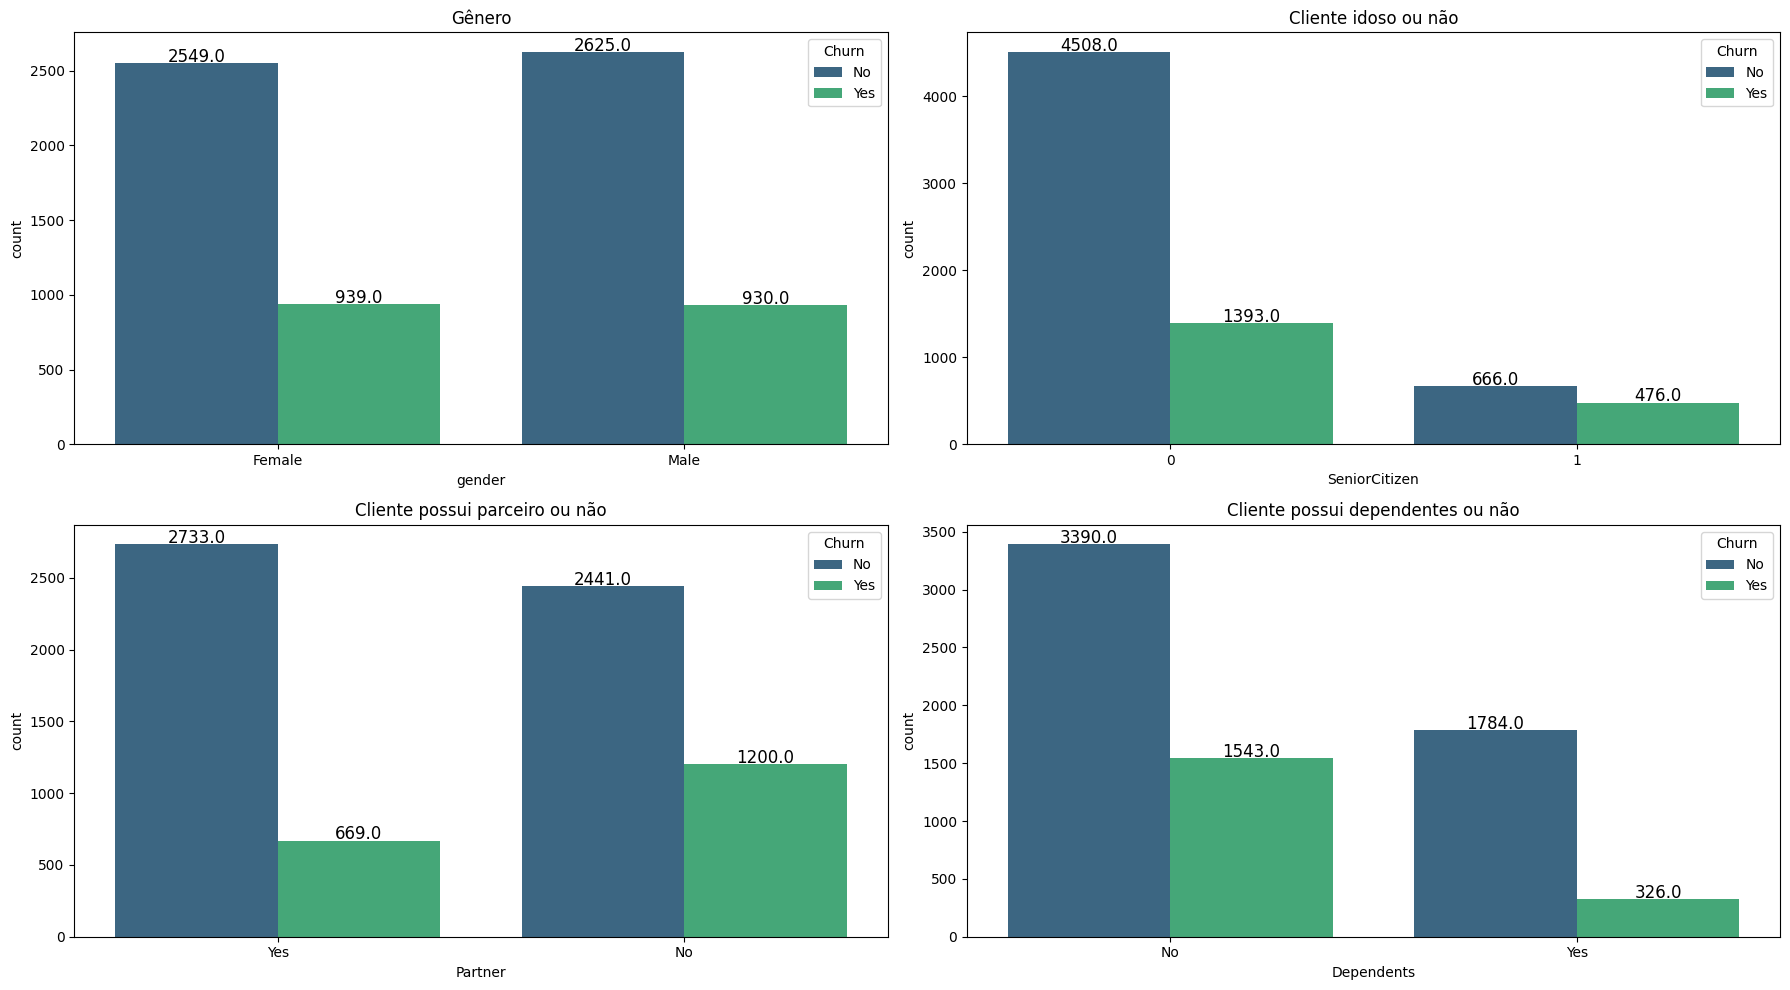

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(18,10))

ax = sns.countplot(x='gender', data=df, palette="viridis", ax=axs[0][0], hue = "Churn")
ax1 = sns.countplot(x='SeniorCitizen', data=df, palette="viridis", ax=axs[0][1], hue = "Churn")
ax2 = sns.countplot(x='Partner', data=df, palette="viridis", ax=axs[1][0], hue = "Churn")
ax3 = sns.countplot(x='Dependents', data=df, palette="viridis", ax=axs[1][1], hue = "Churn")

plot_annotate(ax, 'Gênero')
plot_annotate(ax1, "Cliente idoso ou não")
plot_annotate(ax2, "Cliente possui parceiro ou não")
plot_annotate(ax3, "Cliente possui dependentes ou não")

plt.tight_layout()
plt.show()

#### Serviços Inscritos

**Serviços para os quais o(a) cliente possui inscrição**

Telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes.

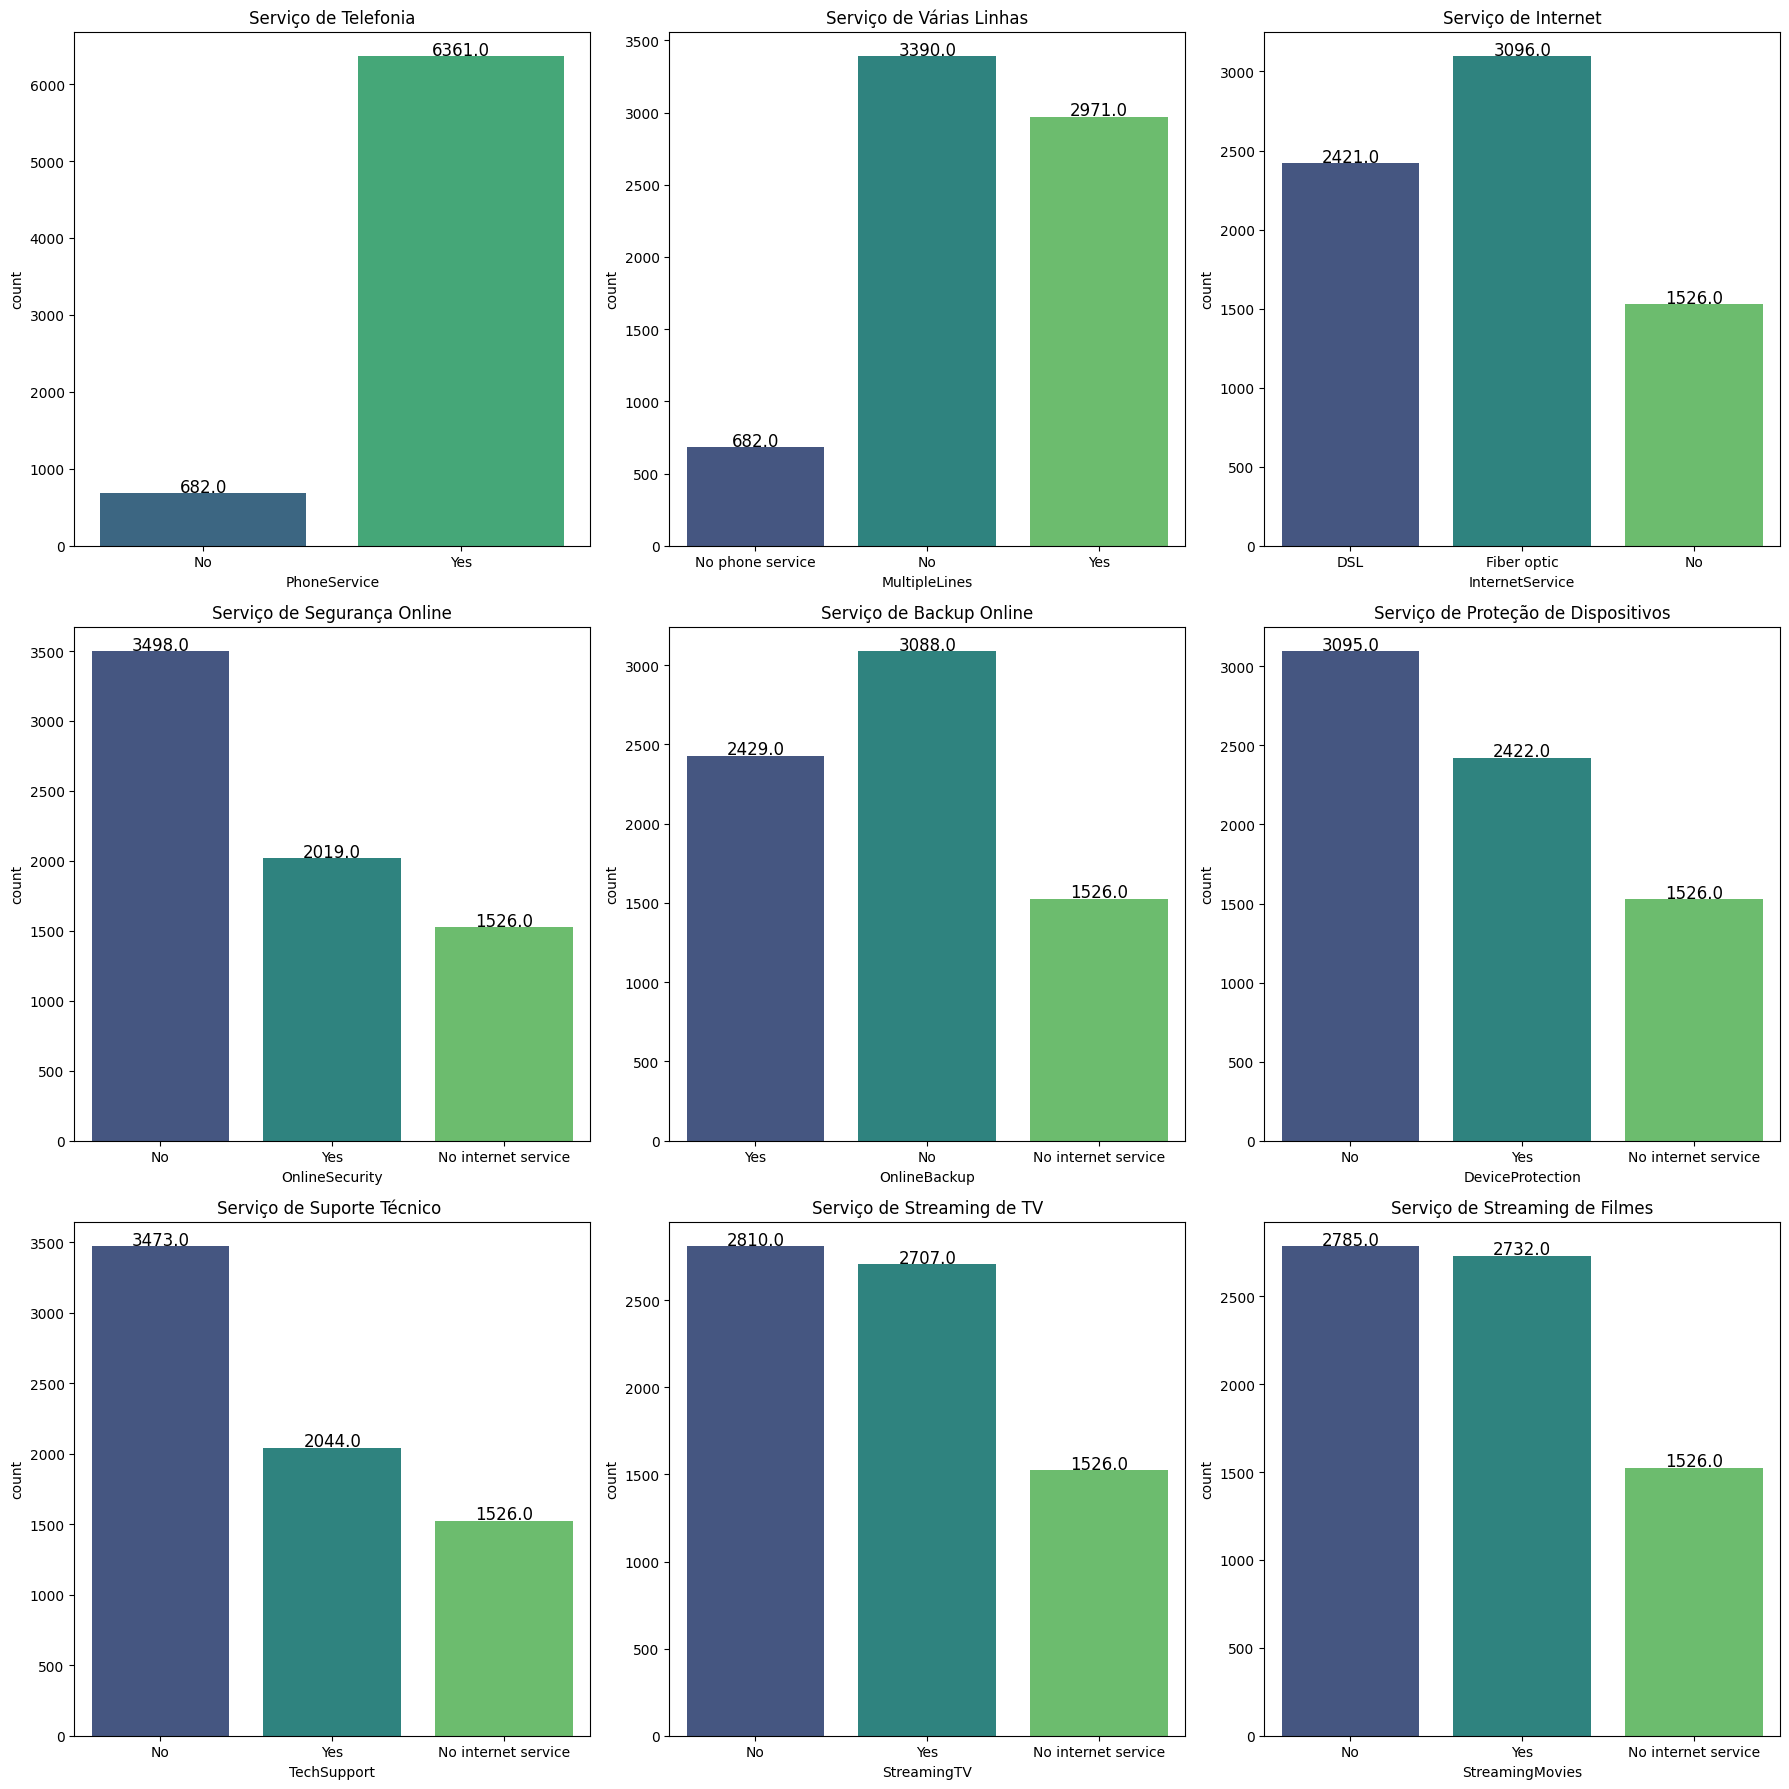

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))

ax = sns.countplot(x='PhoneService', data=df, palette="viridis", ax=axs[0][0])
ax1 = sns.countplot(x='MultipleLines', data=df, palette="viridis", ax=axs[0][1])
ax2 = sns.countplot(x='InternetService', data=df, palette="viridis", ax=axs[0][2])
ax3 = sns.countplot(x='OnlineSecurity', data=df, palette="viridis", ax=axs[1][0])
ax4 = sns.countplot(x='OnlineBackup', data=df, palette="viridis", ax=axs[1][1])
ax5 = sns.countplot(x='DeviceProtection', data=df, palette="viridis", ax=axs[1][2])
ax6 = sns.countplot(x='TechSupport', data=df, palette="viridis", ax=axs[2][0])
ax7 = sns.countplot(x='StreamingTV', data=df, palette="viridis", ax=axs[2][1])
ax8 = sns.countplot(x='StreamingMovies', data=df, palette="viridis", ax=axs[2][2])

plot_annotate(ax, "Serviço de Telefonia")
plot_annotate(ax1, "Serviço de Várias Linhas")
plot_annotate(ax2, "Serviço de Internet")
plot_annotate(ax3, "Serviço de Segurança Online")
plot_annotate(ax4, "Serviço de Backup Online")
plot_annotate(ax5, "Serviço de Proteção de Dispositivos")
plot_annotate(ax6, "Serviço de Suporte Técnico ")
plot_annotate(ax7, "Serviço de Streaming de TV")
plot_annotate(ax8, "Serviço de Streaming de Filmes")

plt.tight_layout()
plt.show()

#### Conta do cliente

**Informações Contidas**

Quanto tempo ele é cliente, contrato, método de pagamento, cobrança sem papel, cobranças mensais e cobranças totais.

#### Permanência dos(as) clientes

In [21]:
qnt_meses = df['tenure'].value_counts().reset_index()
qnt_meses.columns= ['tenure', 'Count']

fig = px.treemap(qnt_meses, path=['tenure'], values='Count', labels={'tenure'})
fig.show()

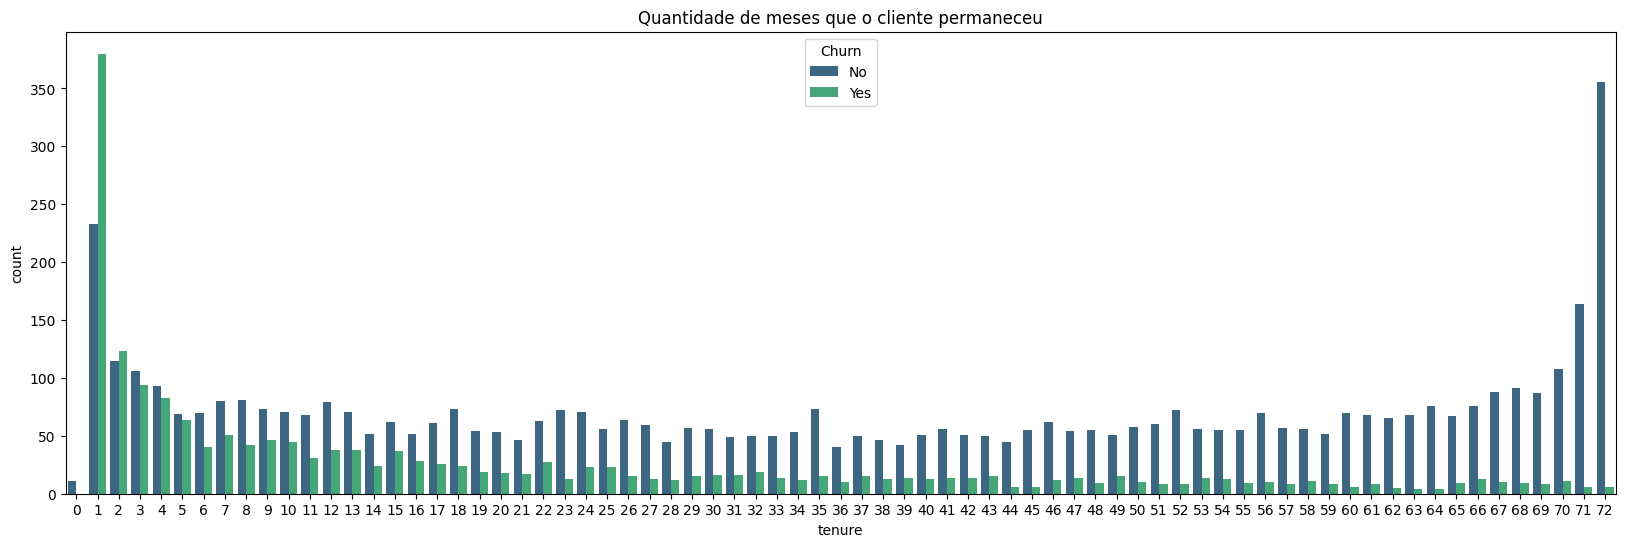

In [22]:
fig, axs = plt.subplots(figsize=(20, 6))
ax = sns.countplot(x='tenure', data=df, palette="viridis", hue = "Churn").set_title('Quantidade de meses que o cliente permaneceu')
plt.show()

#### Distribuição dos dados

**Distribuição dos dados em relação a quantidade de meses, valor cobrado mensalmente e valor total cobrado**

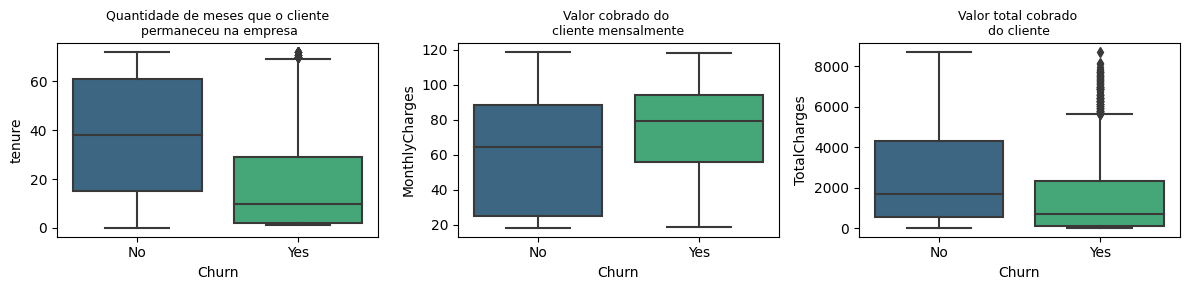

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.boxplot(data=df, x="Churn", y="tenure", palette="viridis", ax=axs[0]).set_title('Quantidade de meses que o cliente\n permaneceu na empresa', fontsize=9)
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="viridis", ax=axs[1]).set_title('Valor cobrado do \ncliente mensalmente', fontsize=9)
sns.boxplot(data=df, x="Churn", y="TotalCharges", palette="viridis", ax=axs[2]).set_title('Valor total cobrado \ndo cliente', fontsize=9)

plt.tight_layout()
plt.show()

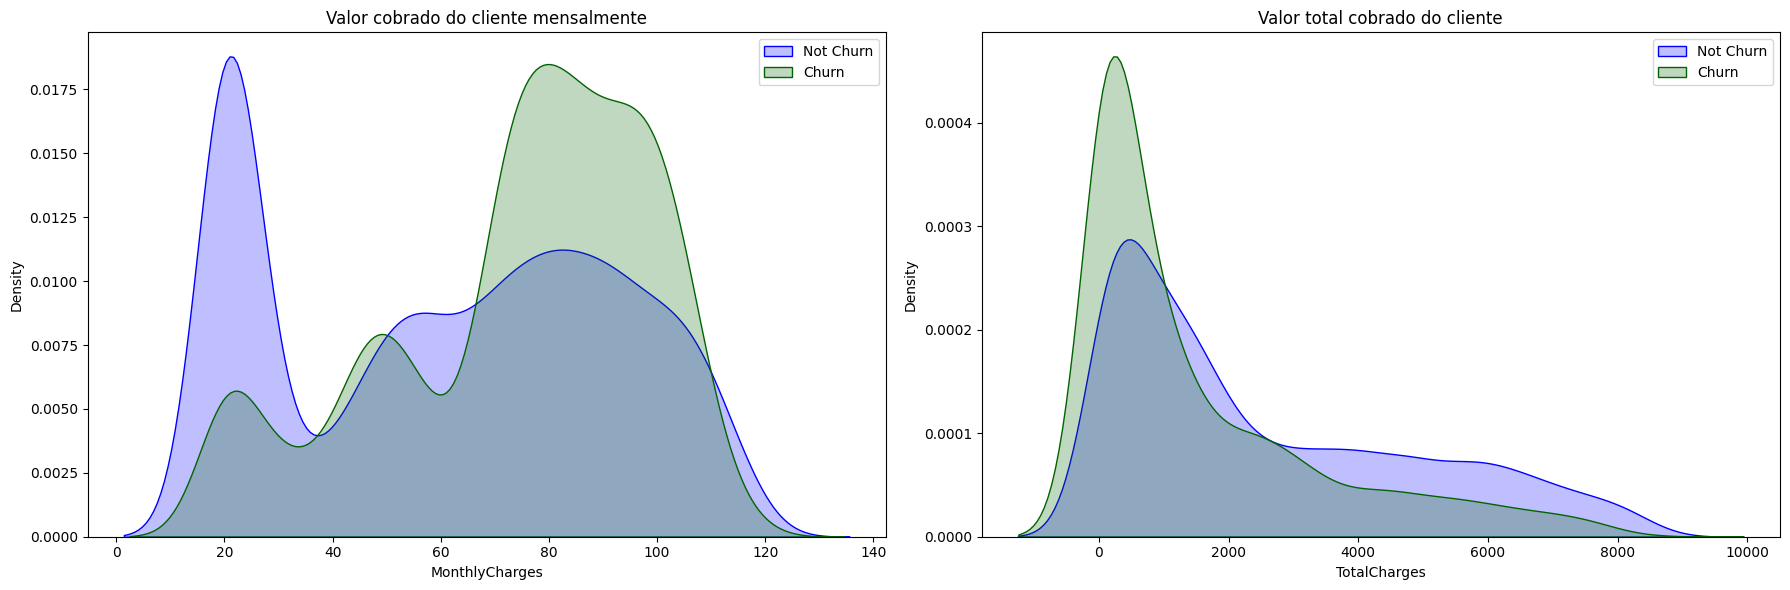

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], color="Blue", fill=True, ax=axs[0]).set_title('Valor cobrado do cliente mensalmente');
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], color="DarkGreen", fill=True, ax=axs[0]).set_title('Valor cobrado do cliente mensalmente');

sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')], color="Blue", fill=True, ax=axs[1]).set_title('Valor total cobrado do cliente');
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')], color="DarkGreen", fill=True, ax=axs[1]).set_title('Valor total cobrado do cliente');

axs[0].legend(["Not Churn", "Churn"], loc='upper right')
axs[1].legend(["Not Churn", "Churn"], loc='upper right')

plt.tight_layout()
plt.show()

#### Vigência do contrato

Informações sobre vigência do contrato, cobrança sem papel e método de pagamento

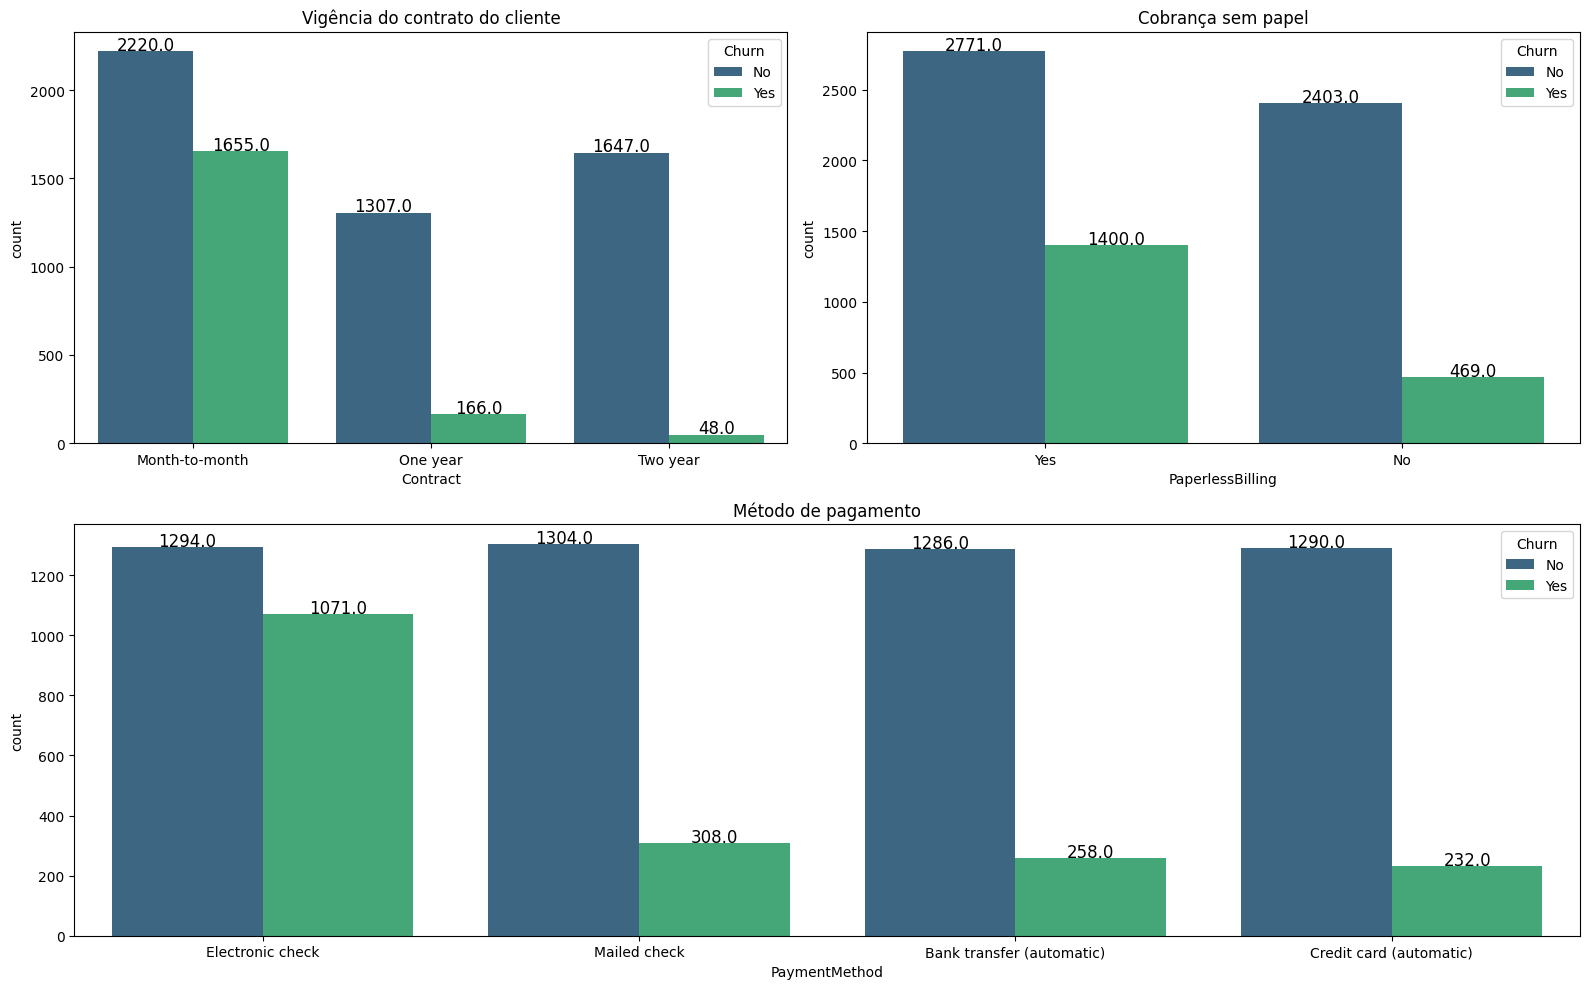

In [25]:
fig, axs = plt.subplot_mosaic("""AB
                                 CC""", figsize=(16,10))

ax1 = sns.countplot(x='Contract', data=df, palette="viridis", ax=axs['A'], hue="Churn")
ax2 = sns.countplot(x='PaperlessBilling', data=df, palette="viridis", ax=axs['B'], hue="Churn")
ax3 = sns.countplot(x='PaymentMethod', data=df, palette="viridis", ax=axs['C'], hue="Churn")

plot_annotate(ax1, 'Vigência do contrato do cliente')
plot_annotate(ax2, "Cobrança sem papel")
plot_annotate(ax3, "Método de pagamento")

plt.tight_layout()
plt.show()

## **M**odel (Modelagem)

### Pré-processamento dos dados

#### Exclusão de colunas

Excluindo a coluna ID

In [26]:
df.drop(['customerID'], axis=1, inplace=True)

#### Codificação de dados Categóricos

A codificação de dados categóricos é um processo em que variáveis categóricas, ou seja, variáveis que representam categorias ou grupos distintos, são convertidas em uma forma numérica adequada para análise em algoritmos de aprendizado de máquina. Existem diferentes técnicas de codificação, sendo as mais comuns a codificação one-hot e a codificação ordinal.



##### One-hot-encoder

A codificação one-hot é uma técnica comumente utilizada para converter variáveis categóricas em uma representação numérica adequada para análise em algoritmos de aprendizado de máquina.

Nessa técnica, cada categoria é mapeada para uma variável binária separada, onde cada variável representa a presença ou ausência da categoria correspondente.

Por exemplo, se tivermos uma variável categórica chamada Cor com três categorias possíveis: vermelho, verde e azul, a codificação one-hot criará três variáveis binárias separadas:

    Cor_Vermelho: 1 se a cor é vermelha, 0 caso contrário
    Cor_Verde: 1 se a cor é verde, 0 caso contrário
    Cor_Azul: 1 se a cor é azul, 0 caso contrário

Essa codificação garante que as relações entre as categorias não sejam distorcidas por valores numéricos atribuídos arbitrariamente, permitindo que os algoritmos de aprendizado de máquina interpretem corretamente os dados categóricos.

In [27]:
for coluna in df.columns:
  print(f'{coluna}: {df[coluna].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: ['0' '1']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Total

In [28]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
mapeamento = {'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1, '0': 0, '1': 1}

for coluna in columns:
    df[coluna] = df[coluna].map(mapeamento)

In [29]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


#### Normalização dos dados

A **normalização de dados** é um processo utilizado para escalar os valores de diferentes variáveis em uma faixa específica, a fim de evitar que uma variável com valores numericamente maiores domine a análise em relação às outras.

Existem várias técnicas de normalização, sendo a mais comum a **normalização min-max**. Nessa técnica, os valores são ajustados para que fiquem dentro de um intervalo predefinido, geralmente entre 0 e 1.

O processo de normalização min-max envolve a subtração do valor mínimo de cada observação e a divisão pelo intervalo entre o valor máximo e o valor mínimo. Isso garante que os valores sejam redimensionados proporcionalmente, mantendo as relações entre eles.

Por exemplo, se tivermos uma variável com valores entre 20 e 80, a normalização min-max ajustaria esses valores para uma nova faixa de 0 a 1, onde 20 seria mapeado para 0 e 80 seria mapeado para 1.

A normalização de dados é especialmente útil quando as variáveis têm escalas diferentes e é importante garantir que todas as variáveis contribuam igualmente para a análise, evitando que valores discrepantes dominem o processo de modelagem.

In [30]:
norm = MinMaxScaler()

df_encoded['tenure'] = norm.fit_transform(df_encoded['tenure'].values.reshape(-1, 1))
df_encoded['MonthlyCharges'] = norm.fit_transform(df_encoded['MonthlyCharges'].values.reshape(-1, 1))
df_encoded['TotalCharges'] = norm.fit_transform(df_encoded['TotalCharges'].values.reshape(-1, 1))

In [31]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,1,0.115423,0.001275,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.472222,1,0,0.385075,0.215867,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,0.027778,1,1,0.354229,0.010310,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.625000,0,0,0.239303,0.210241,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,0.027778,1,1,0.521891,0.015330,1,...,True,False,False,True,False,False,False,False,True,False


In [32]:
df_encoded['tenure'].max()

1.0

#### Alocação de dados em treinamento e teste

A alocação de dados em treinamento e teste é uma prática comum em aprendizado de máquina. O conjunto de treinamento é usado para ajustar os parâmetros do modelo, enquanto o conjunto de teste é utilizado para avaliar o desempenho e a capacidade de generalização do modelo. Os dados de teste não devem ser usados durante o treinamento para evitar avaliações otimistas. É comum dividir os dados em proporções como 70-30, 80-20 ou 90-10, mas também existem técnicas mais avançadas, como a validação cruzada, que permitem uma avaliação mais robusta do modelo. A alocação adequada dos dados é essencial para garantir resultados confiáveis.

In [33]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(5634, 40)
(1409, 40)
(5634,)
(1409,)


#### Balanceamento dos dados

O balanceamento de dados é um processo utilizado em aprendizado de máquina para lidar com conjuntos de dados desbalanceados, onde a quantidade de amostras em cada classe é significativamente diferente. Isso pode ocorrer em problemas de classificação, por exemplo, em que uma classe pode ter muitas amostras, enquanto outras têm poucas. O desbalanceamento pode afetar negativamente o desempenho do modelo, levando-o a ter viés em direção à classe majoritária. Para superar esse problema, técnicas de balanceamento são aplicadas, como oversampling (aumentar amostras da classe minoritária), undersampling (reduzir amostras da classe majoritária) ou combinações dessas abordagens. O objetivo é criar um conjunto de dados balanceado, permitindo que o modelo aprenda de forma igualitária a partir de todas as classes e obtenha uma melhor capacidade de generalização.

##### SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica utilizada para lidar com o desbalanceamento de dados em problemas de classificação. Em vez de simplesmente replicar amostras da classe minoritária (oversampling), o SMOTE cria novas amostras sintéticas por meio da combinação de recursos de amostras próximas. Essa técnica gera dados sintéticos que representam pontos intermediários entre as amostras existentes, aumentando assim a variedade e a representatividade da classe minoritária. Isso ajuda a equilibrar o conjunto de dados, melhorando o desempenho do modelo ao reduzir o viés em direção à classe majoritária e permitir que o modelo aprenda de forma mais equilibrada a partir de todas as classes.

In [35]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Churn
0    4139
1    4139
Name: count, dtype: int64


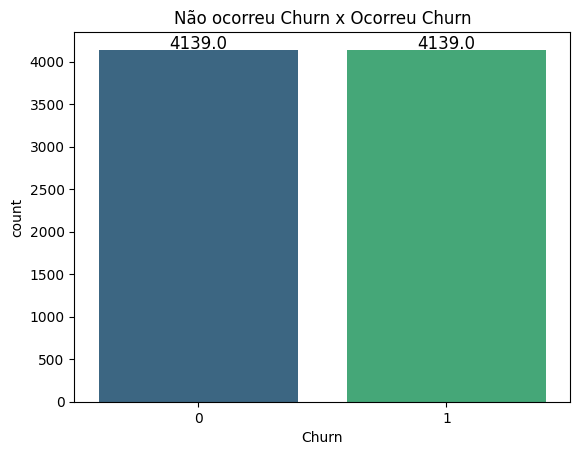

In [36]:
print(y_train_smote.value_counts())
ax1 = sns.countplot(x=y_train_smote, palette="viridis")
plot_annotate(ax1, 'Não ocorreu Churn x Ocorreu Churn')

### Construção do modelo

####Grid Search

O Grid Search é uma técnica usada para auxiliar na determinação dos valores ideais para os hiperparâmetros de um modelo e controlar sua complexidade. Para um modelo de MLP, os hiperparâmetros incluem o número de neurônios e camadas ocultas (hidden_layer_sizes), a função de ativação (activation) e o otimizador (solver). Para um modelo SVM, o hiperparâmetro relevante é o tipo de kernel a ser usado (kernel). O Grid Search realiza uma busca exaustiva por combinações desses hiperparâmetros dentro de um espaço pré-definido, avaliando o desempenho do modelo em cada combinação. Isso permite encontrar a combinação que produz o melhor desempenho em relação às métricas escolhidas, como acurácia ou precisão. O Grid Search é uma ferramenta valiosa para otimizar o desempenho do modelo, selecionando os hiperparâmetros mais adequados para cada algoritmo e conjunto de dados específico.

In [37]:
def grid_search(X_train, y_train, param_grid, model):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Melhores hiperparâmetros:", grid_search.best_params_)
    print("Acurácia no conjunto de teste:", grid_search.best_estimator_.score(X_test, y_test))
    print("Melhor Pontuação de validação cruzada: ", grid_search.best_score_)

In [38]:
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100), (100, 100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam']
}

mlp = MLPClassifier()

In [39]:
param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

model_svm = svm.SVC()

In [40]:
grid_search(X_train_smote, y_train_smote, param_grid_mlp, mlp)

/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/r

Melhores hiperparâmetros: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Acurácia no conjunto de teste: 0.7629524485450674
Melhor Pontuação de validação cruzada:  0.827265131281288


In [41]:
grid_search(X_train_smote, y_train_smote, param_grid_svm, model_svm)

Melhores hiperparâmetros: {'kernel': 'poly'}
Acurácia no conjunto de teste: 0.7665010645848119
Melhor Pontuação de validação cruzada:  0.8241211670096472


#### Treinamento

In [42]:
def train(X, y, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    val_acc, test_acc = [], []

    for train_index, val_index in kf.split(X, y):

        x_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train1, y_val = y.iloc[train_index], y.iloc[val_index]

        # Treina o modelo
        model.fit(x_train, y_train1)

        # Acurácia de validação
        y_val_pred = model.predict(X_val)
        val_acc.append(accuracy_score(y_val, y_val_pred))

        # Valores preditos para os dados de teste
        test_acc.append(model.predict(X_test))

    # Imprimir as acurácias de treinamento e validação para cada fold
    for fold, val_scores in enumerate(val_acc):
        print(f"Fold {fold+1}: ACC: {val_scores:.4f}")

    # Calcular a média das acurácias de treinamento e validação
    mean_val_accuracy = sum(val_acc) / len(val_acc)
    print(f"Média : ACC: {mean_val_accuracy:.4f}\n")

    return val_acc, test_acc

##### MLP

MLP (Multilayer Perceptron) é um tipo de rede neural artificial composta por múltiplas camadas de neurônios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada neurônio está conectado a neurônios nas camadas subsequentes através de pesos ajustáveis. MLP é capaz de aprender a partir dos dados e realizar tarefas de classificação e regressão, sendo amplamente utilizado em problemas de aprendizado de máquina.

**Melhores hiperparâmetros:**

```
{
  'activation': 'relu',
  'hidden_layer_sizes': (100,),
  'solver': 'adam'
}
```

In [43]:
mlp_model = MLPClassifier(activation = 'tanh', max_iter=300,
                           hidden_layer_sizes=(100, ), solver='adam',
                           verbose=False, random_state=1)


val_acc_mlp, test_acc_mlp = train(X_train_smote, y_train_smote, mlp_model)

/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



Fold 1: ACC: 0.8412
Fold 2: ACC: 0.8357
Fold 3: ACC: 0.8255
Fold 4: ACC: 0.8435
Fold 5: ACC: 0.8290
Média : ACC: 0.8350



/Users/rob/Projects/AP2/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



##### SVM

SVM (Support Vector Machine) é um algoritmo de aprendizado de máquina supervisionado utilizado para tarefas de classificação e regressão. Ele mapeia os dados de entrada em um espaço dimensional superior para encontrar um hiperplano que separe as classes de forma ótima. Os vetores de suporte são os pontos mais próximos ao hiperplano de separação. O SVM é eficaz em lidar com dados linearmente e não linearmente separáveis, utilizando diferentes tipos de kernel para mapear os dados em espaços de maior dimensionalidade.

**Melhores hiperparâmetros:**
```
{
  'kernel': 'poly'
}
```

In [44]:
svm_model = svm.SVC(kernel='poly')
val_acc_svm, test_acc_svm = train(X_train_smote, y_train_smote, svm_model)

Fold 1: ACC: 0.8400
Fold 2: ACC: 0.8351
Fold 3: ACC: 0.8339
Fold 4: ACC: 0.8447
Fold 5: ACC: 0.8205
Média : ACC: 0.8349



## **I**nterpret (Interpretação)

In [45]:
def print_results(y_test, results):
    dict_results = {}
    dict_results = pd.DataFrame({
        'Acurácia': pd.Series([np.round(accuracy_score(y_test, results)*100, decimals=2)]),
        'Precisão': pd.Series([np.round(precision_score(y_test, results, average=None)*100, decimals=2)]),
        'Recall': pd.Series([np.round(recall_score(y_test, results, average=None)*100, decimals=2)]),
        'F1-Scrore': pd.Series([np.round(f1_score(y_test, results, average=None)*100, decimals=2)]),
        'AUC': pd.Series([np.round(roc_auc_score(y_test, results)*100, decimals=2)])
    })

    return pd.DataFrame(dict_results)

### Teste - MLP

In [46]:
predicted_mlp = test_acc_mlp[np.argmax(val_acc_mlp)]
df_mlp = print_results(y_test, predicted_mlp)
df_mlp

,Acurácia,Precisão,Recall,F1-Scrore,AUC
0,76.65,"[86.24, 55.17]","[81.16, 64.17]","[83.62, 59.33]",72.67


###Teste - SVM

In [47]:
predicted_svm = test_acc_svm[np.argmax(val_acc_svm)]
df_svm = print_results(y_test, predicted_svm)
df_svm

,Acurácia,Precisão,Recall,F1-Scrore,AUC
0,76.3,"[87.09, 54.31]","[79.52, 67.38]","[83.13, 60.14]",73.45


### Resultados MLP e SVM

In [48]:
df_results = pd.concat([df_mlp, df_svm])
df_results.index = ['MLP', 'SVM']
df_results

,Acurácia,Precisão,Recall,F1-Scrore,AUC
MLP,76.65,"[86.24, 55.17]","[81.16, 64.17]","[83.62, 59.33]",72.67
SVM,76.30,"[87.09, 54.31]","[79.52, 67.38]","[83.13, 60.14]",73.45


### Matriz de Confusão

A matriz de confusão é uma tabela que mostra o desempenho de um modelo de classificação. Ela compara as classificações reais das amostras com as previsões feitas pelo modelo. A matriz é dividida em quatro células: verdadeiro positivo (TP), verdadeiro negativo (TN), falso positivo (FP) e falso negativo (FN). Essas células representam as diferentes combinações de acertos e erros do modelo. A matriz de confusão fornece uma visão geral das métricas de desempenho, como acurácia, precisão, recall e F1-score, permitindo avaliar a capacidade de classificação do modelo.

|        |                  | Classificação real |           |
| ------ | ---------------- | ----------------- | --------- |
|        |                  | P                 | N         |
| **Classificação prevista** | **P**              | **VP**            | FP        |
|        | **N**              | FN                | **VN**            |


_Onde: P = Positivo; N = Negativo; VP = Verdadeiro Positivo; FP = Falso Positivo; VN = Verdadeiro Negativo; FN = Falso Negativo._

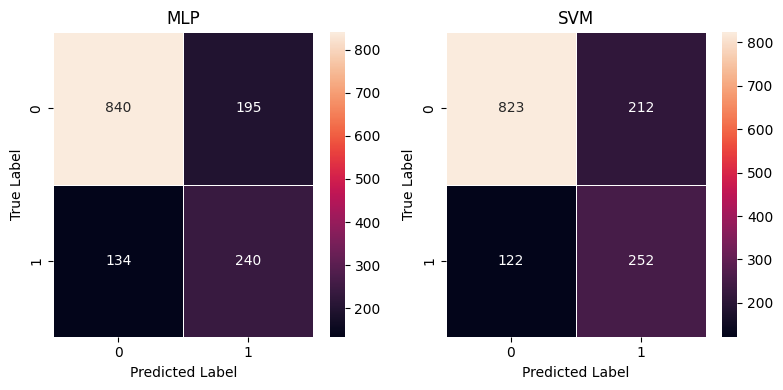

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.heatmap(metrics.confusion_matrix(y_test, predicted_mlp), annot=True, linewidth=.5, fmt='g', ax=axs[0]).set(title='MLP', ylabel='True Label', xlabel='Predicted Label')
sns.heatmap(metrics.confusion_matrix(y_test, predicted_svm), annot=True, linewidth=.5, fmt='g', ax=axs[1]).set(title='SVM', ylabel='True Label', xlabel='Predicted Label')
plt.tight_layout()
plt.show()

### Curva ROC

A curva ROC (Receiver Operating Characteristic) é uma representação gráfica do desempenho de um modelo de classificação binária. Ela é construída plotando a taxa de verdadeiros positivos (TPR) no eixo y e a taxa de falsos positivos (FPR) no eixo x, em diferentes pontos de corte do classificador. A curva ROC permite avaliar a capacidade de um modelo em distinguir entre as classes positiva e negativa, independentemente do ponto de corte escolhido. Quanto mais próxima a curva estiver do canto superior esquerdo, melhor será o desempenho do modelo, indicando uma maior taxa de acerto e uma menor taxa de falsos positivos. A área sob a curva ROC (AUC-ROC) é uma medida resumida do desempenho do modelo, sendo que um valor de 1 representa uma classificação perfeita e um valor de 0.5 indica um desempenho aleatório.

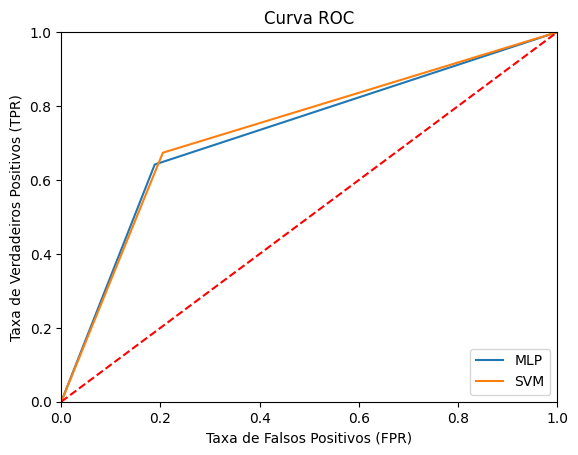

In [50]:
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, predicted_mlp)
fpr_svm, tpr_svm, _ = roc_curve(y_test, predicted_svm)


plt.plot(fpr_mlp, tpr_mlp, label='MLP')
plt.plot(fpr_svm, tpr_svm, label='SVM')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()